In [1]:
import gym
import shinrl as srl
from shinrl import ContinuousDdpgSolver
import matplotlib.pyplot as plt

import jax.numpy as jnp
import jax
from brax import envs

In [3]:
env = envs.create(env_name="halfcheetah")
env = envs.wrappers.GymWrapper(env)
env.reset()

config = ContinuousDdpgSolver.DefaultConfig(
    approx="nn",
    explore="normal",
    eval_interval=10000,
    add_interval=1,
    steps_per_epoch=400000,
)

mixins = ContinuousDdpgSolver.make_mixins(env, config)
solver = ContinuousDdpgSolver.factory(env, config, mixins)

2021-12-27T06:54:26.602233Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 10000, 'add_interval': 1, 'steps_per_epoch': 400000, 'explore': <EXPLORE.normal: 2>, 'exploit': <EXPLOIT.greedy: 1>, 'approx': <APPROX.nn: 1>, 'pol_lr': 0.0001, 'q_lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'replay_start_size': 5000, 'normal_scale': 0.3, 'hidden': 128, 'depth': 2, 'polyak_rate': 0.01, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'q_loss_fn': <LOSS.l2_loss: 5>} env_id=None solver_id=MixedSolver-1
2021-12-27T06:54:26.603094Z set_env is called.             env_id=0 solver_id=MixedSolver-1
2021-12-27T06:54:26.604751Z Solver is initialized.         env_id=0 methods=['BaseSolver.__init__', 'NetActMixIn._build_act_fn', 'CalcParamsRlMixIn._build_calc_params', 'BuildNetMixIn._build_net', 'BuildNetMixIn._build_net_data', 'History.add_scalar', 'BaseGymEvalMixIn.eval_act', 'BaseGymEvalMixIn.evalu

In [4]:
solver.run()

Epoch 0: 100%|█████████████| 400000/400000 [12:28<00:00, 534.71it/s]
2021-12-27T07:06:55.810306Z Epoch 1 has ended.             data=['QNetParams', 'QNetTargParams', 'QOptState', 'PolNetParams', 'PolNetTargParams', 'PolOptState'] env_id=0 epoch_summary={'Return': {'Average': 2467.7315393066406, 'Max': 3490.380859375, 'Min': -375.040283203125}, 'PolLoss': {'Average': -187.44285568689358, 'Max': 6.3066253662109375, 'Min': -293.9339294433594}, 'QLoss': {'Average': 44.25101046795115, 'Max': 2879.010498046875, 'Min': 0.3803326189517975}} solver_id=MixedSolver-1


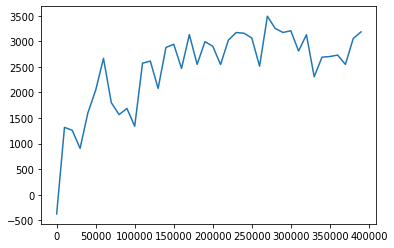

In [7]:
plt.plot(solver.scalars["Return"]["x"], solver.scalars["Return"]["y"])

In [22]:
from IPython.display import Image, HTML
from brax.io import image, html

In [17]:
obs = env.reset()
done = False
rollout = []

while not done:
    rollout.append(env._state)
    solver.key, act, _ = solver.eval_act(solver.key, obs)
    obs, _, done, _ = env.step(act)

In [24]:
HTML(html.render(env._env.sys, [s.qp for s in rollout]))